<a href="https://colab.research.google.com/github/narc-kany/Netflix-Stock-Price-Prediction/blob/main/NFLX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# installing dependencies 
# The train_test_split function is for splitting a single dataset for two different
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh') 

In [31]:
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX (3).csv


In [64]:
# store the data in a dframe
df = pd.read_csv('NFLX.csv', delimiter=',', header=None, skiprows=1, names=['Date','Open','High','Low','Close','Adj Close','Volume'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
...,...,...,...,...,...,...,...
1002,2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100
1003,2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800
1004,2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600
1005,2019-12-13,298.500000,301.799988,297.250000,298.500000,298.500000,3879700


In [65]:
# show the first 10 rows
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,2015-12-23,116.910004,118.559998,115.779999,118.160004,118.160004,9324300
6,2015-12-24,118.220001,118.800003,117.300003,117.330002,117.330002,3531300
7,2015-12-28,117.260002,117.349998,113.849998,117.110001,117.110001,8424300
8,2015-12-29,118.190002,119.599998,116.919998,119.120003,119.120003,8159200
9,2015-12-30,118.949997,119.019997,116.430000,116.709999,116.709999,8149700


In [66]:
# Get number of trained days in dataset
df.shape

(1007, 7)

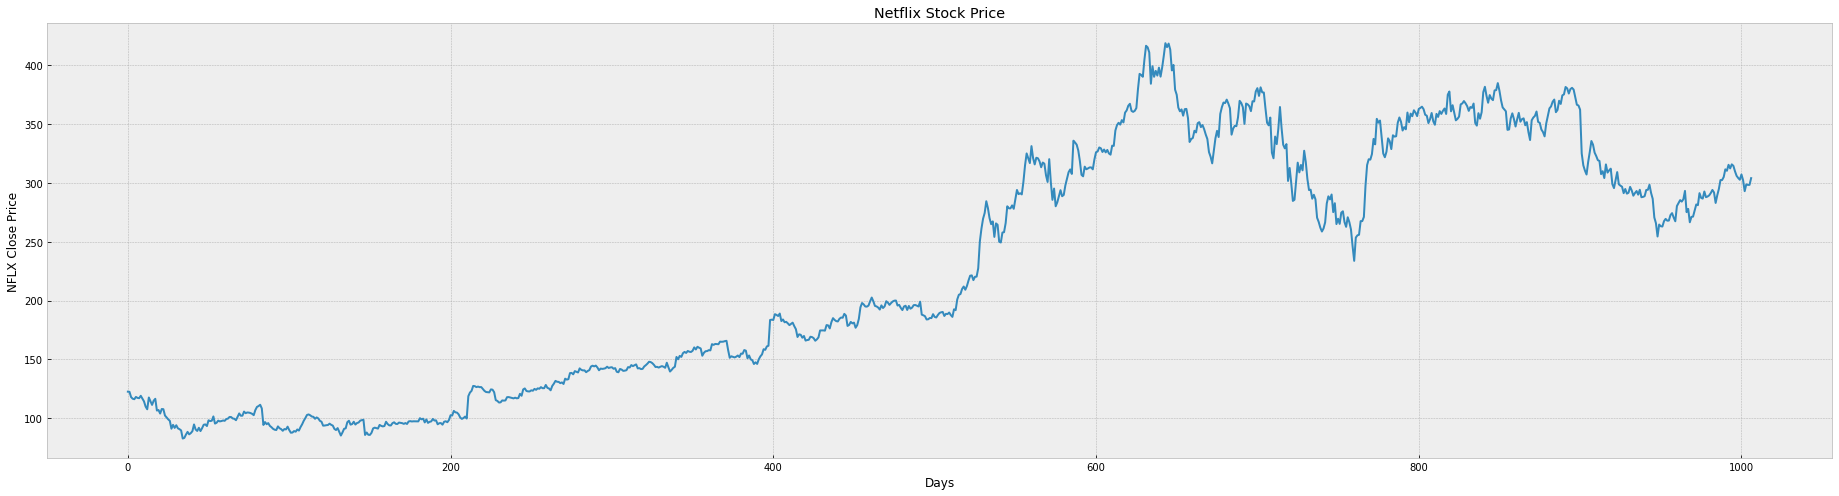

In [67]:
# Visualize the close price data 
plt.figure(figsize = (32, 8))
plt.title('Netflix Stock Price')
plt.xlabel('Days')
plt.ylabel('NFLX Close Price')
plt.plot(df['Close'])
plt.show()

In [68]:
# Get the Close price
df = df[['Close']]
df.head(10)

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997
4,116.239998
5,118.160004
6,117.330002
7,117.110001
8,119.120003
9,116.709999


In [69]:
df.shape

(1007, 1)

In [70]:
# Predict n days into the future
future_days = 10
# Create a new column target data - Predict values n days away from current price
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
0,122.639999,114.379997
1,122.510002,109.959999
2,118.019997,107.660004
3,116.629997,117.680000


In [71]:
# check the end shift
df.tail(10)

,Close,Prediction
997,306.160004,NaN
998,304.320007,NaN
999,302.859985,NaN
1000,307.350006,NaN
1001,302.500000,NaN
1002,293.119995,NaN
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [73]:
# Create a feature dataset and create a numpy array and remove the NaN days/rows 
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)



[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [75]:
# Create target set
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[114.379997 109.959999 107.660004 117.68     114.559998 111.389999
 114.970001 116.580002 106.559998 107.059998 104.040001 107.889999
 107.739998 102.349998 100.720001  99.120003  97.830002  91.150002
  94.410004  91.839996  94.089996  91.489998  90.739998  89.709999
  82.790001  83.32      86.129997  88.449997  86.349998  87.400002
  89.050003  94.760002  90.489998  89.230003  91.93      89.120003
  91.610001  94.529999  94.790001  93.410004  98.300003  97.610001
  97.93     101.580002  95.489998  96.230003  98.        97.360001
  97.660004  98.129997  97.860001  99.349998  99.720001 101.120003
 101.059998  99.839996  99.589996  98.360001 101.209999 104.129997
 102.190002 102.230003 105.699997 104.349998 104.940002 104.830002
 104.449997 103.809998 102.68     106.980003 109.650002 110.419998
 111.510002 108.400002  94.339996  96.769997  94.980003  95.900002
  93.559998  92.43      91.040001  90.279999  90.029999  93.110001
  91.540001  90.790001  89.370003  90.839996  90.540001  92.88

In [77]:
# train and test ratio is 7:3
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [79]:
# Create models
# Decision Tree Regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
# Linear Regression Model
linr = LinearRegression().fit(x_train, y_train) 

In [81]:
# Get x rows on future data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[302.570007],
       [302.600006],
       [305.160004],
       [311.690002],
       [310.480011],
       [315.549988],
       [312.48999 ],
       [315.929993],
       [314.660004],
       [309.98999 ]])

In [82]:
# Prediction model for Decision Tree Regressor
tree_prediction = tree.predict(x_future)
print(x_future)

[[302.570007]
 [302.600006]
 [305.160004]
 [311.690002]
 [310.480011]
 [315.549988]
 [312.48999 ]
 [315.929993]
 [314.660004]
 [309.98999 ]]


In [83]:
# Prediction model for Linear Regression model
linear_prediction = linr.predict(x_future)
print(x_future)

[[302.570007]
 [302.600006]
 [305.160004]
 [311.690002]
 [310.480011]
 [315.549988]
 [312.48999 ]
 [315.929993]
 [314.660004]
 [309.98999 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


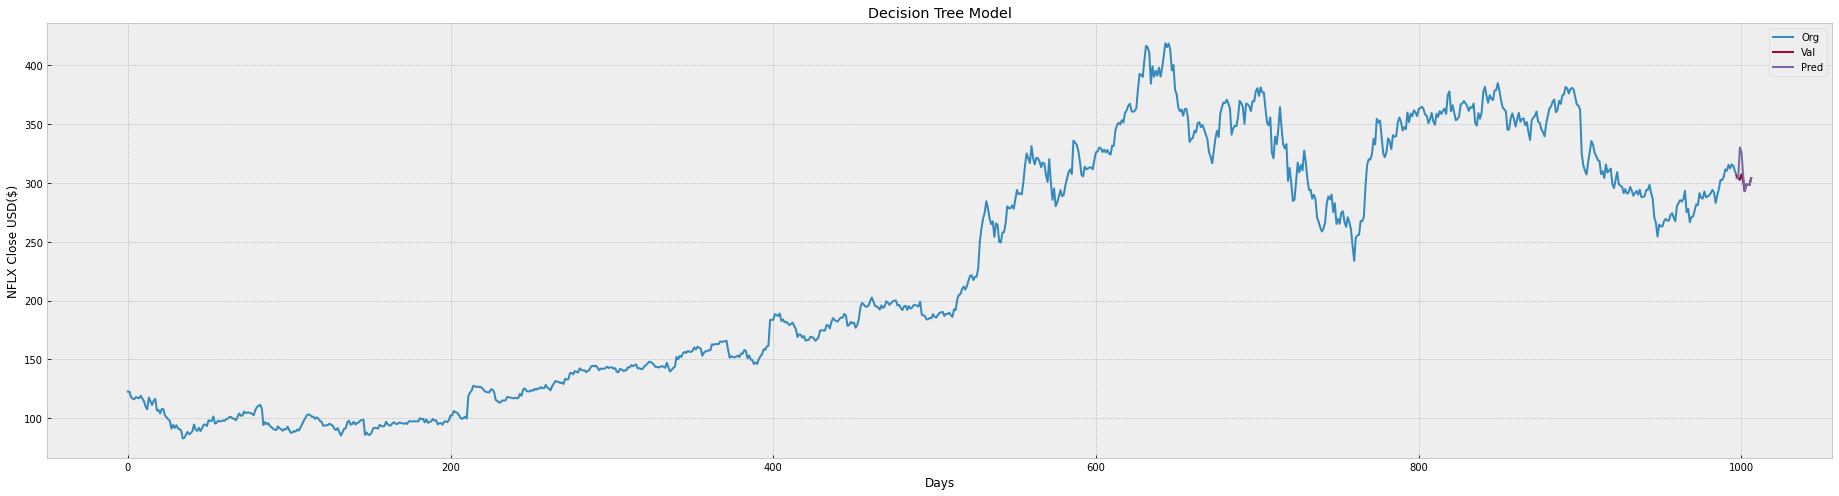

In [84]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (32, 8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('NFLX Close USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Org', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


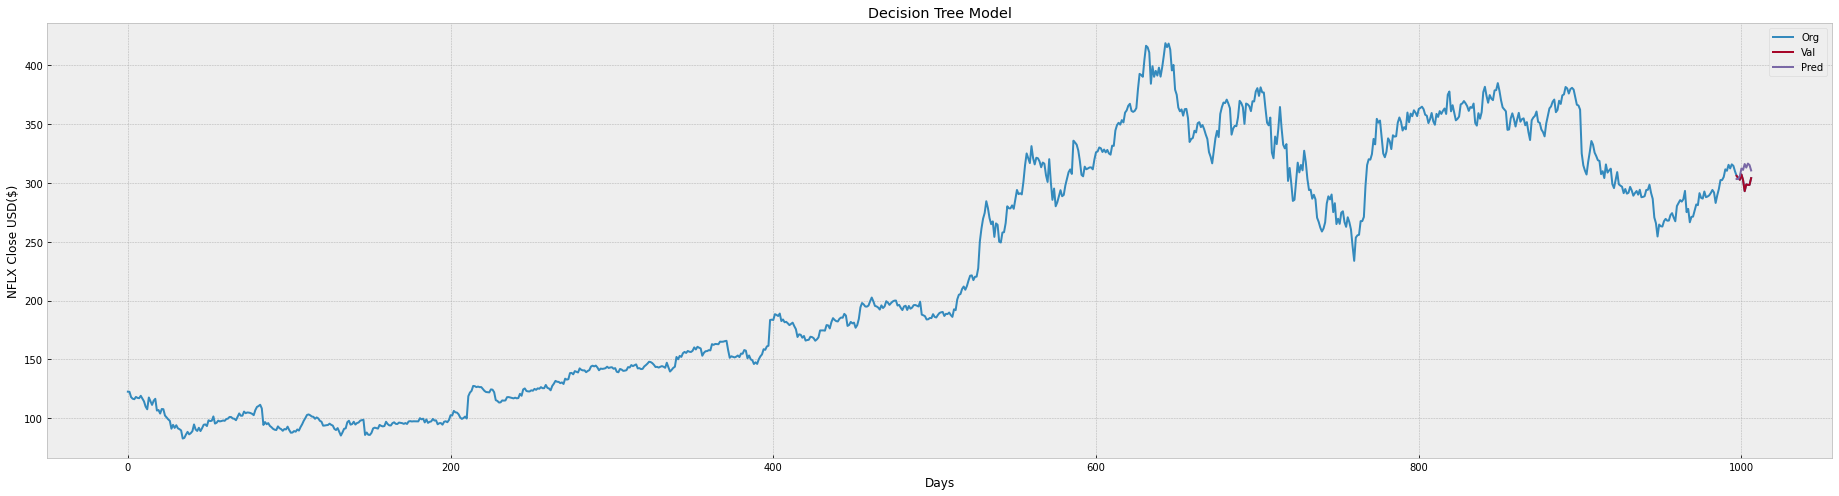

In [85]:
# Visualize the data 
predictions = linear_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (32, 8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('NFLX Close USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Org', 'Val', 'Pred'])
plt.show()